In [1]:
import torch

# PyTorch에서 난수를 재현 가능하도록 시드(seed) 설정
torch.manual_seed(42)

# 사용할 CUDA 디바이스 ID를 설정 (3번 GPU 사용)
device_id = 3

# 사용할 GPU 메모리의 비율 설정 (0.4 = 40% 사용)
using = 0.4

# GPU가 사용 가능하면 설정한 CUDA 디바이스를 사용하고, 그렇지 않으면 CPU 사용
device = torch.device(f"cuda:{device_id}" if torch.cuda.is_available() else "cpu")

# 아래 주석 처리된 코드는 특정 GPU 메모리 사용량을 설정하고 캐시를 비우는 작업
# torch.cuda.set_per_process_memory_fraction(using, device_id)  # 지정된 GPU 메모리 비율 설정
# torch.cuda.empty_cache()  # GPU 캐시 메모리 비우기

# # GPU 총 메모리 크기 계산
# total_memory = torch.cuda.get_device_properties(device_id).total_memory
# 
# # 설정한 메모리 비율(0.4)에 따라 임시 텐서를 생성 (using-0.001은 약간 여유를 둠)
# tmp_tensor = torch.empty(int(total_memory * (using-0.001)), dtype=torch.int8, device=device)
# print(f'use:{tmp_tensor}')  # 사용된 텐서 출력 (디버깅 용도)

import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data.sampler import WeightedRandomSampler

In [16]:
from LoadData import load_data, train_model, show_result

3379
Class: A, Count: 1401
Class: B, Count: 739
Class: C, Count: 695
Class: F, Count: 544
846
Class: A, Count: 351
Class: B, Count: 185
Class: C, Count: 175
Class: F, Count: 135
B  F  C  F  C  B  B  F


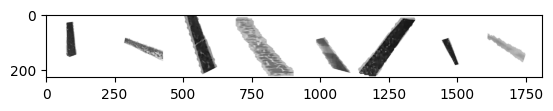

In [6]:
# 데이터 로더 로드 (load_data 함수가 데이터를 로드하는 것으로 가정)
dataloaders_dict = load_data()

import matplotlib.pyplot as plt
import numpy as np
import torchvision

# 이미지를 화면에 표시하기 위한 헬퍼 함수
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        # 이미지를 단일 채널(흑백)로 변환
        img = img.mean(dim=0)
    img = img / 2 + 0.5  # 정규화 해제 (unnormalize)
    npimg = img.numpy()  # 텐서를 numpy 배열로 변환
    if one_channel:
        # 흑백 이미지로 출력
        plt.imshow(npimg, cmap="Greys")
    else:
        # RGB 이미지로 출력
        plt.imshow(np.transpose(npimg, (1, 2, 0)))  # 텐서 축을 변환하여 출력

# 클래스 레이블 정의 (예: A, B, C, F)
classes = ('A', 'B', 'C', 'F')

# 학습 데이터 로더에서 배치 데이터를 가져옴
dataiter = iter(dataloaders_dict['train'])
images, labels = next(dataiter)

# 배치에서 가져온 이미지를 격자로 변환하여 화면에 표시
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)

# 배치에서 각 이미지의 클래스 레이블을 출력
print('  '.join(classes[labels[j]] for j in range(8)))

In [4]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /home/lunfei/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth


  0%|          | 0.00/21.1M [00:00<?, ?B/s]

In [14]:
use_pretrained= True
net = models.mobilenet_v3_large(pretrained=use_pretrained)

net.features[0][0] = nn.Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
net.classifier[3] = nn.Linear(in_features=1280, out_features=4, bias=True)

optimizer = optim.SGD(params=net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
net = net.to(device)
# train_model 함수 실행
num_epochs = 50
result = train_model(net, dataloaders_dict, criterion, optimizer, 
                     num_epochs=num_epochs, save_model='./Model/mobilenet_v3_large.pth',
                     device=device)

Epoch 1/ 50
******************************


100%|██████████| 106/106 [00:03<00:00, 26.51it/s]


max val acc:0.19858156028368795, save in ./Model/mobilenet_v3_large.pth
val Loss 1.4065 Acc : 0.1986
Epoch 2/ 50
******************************


100%|██████████| 423/423 [00:30<00:00, 13.76it/s]


train Loss 0.9982 Acc : 0.5718


100%|██████████| 106/106 [00:03<00:00, 27.67it/s]


max val acc:0.2884160756501182, save in ./Model/mobilenet_v3_large.pth
val Loss 1.9776 Acc : 0.2884
Epoch 3/ 50
******************************


100%|██████████| 423/423 [00:31<00:00, 13.33it/s]


train Loss 0.7126 Acc : 0.7085


100%|██████████| 106/106 [00:04<00:00, 26.07it/s]


max val acc:0.43853427895981084, save in ./Model/mobilenet_v3_large.pth
val Loss 1.5817 Acc : 0.4385
Epoch 4/ 50
******************************


100%|██████████| 423/423 [00:31<00:00, 13.26it/s]


train Loss 0.5859 Acc : 0.7662


100%|██████████| 106/106 [00:03<00:00, 27.30it/s]


max val acc:0.5957446808510638, save in ./Model/mobilenet_v3_large.pth
val Loss 0.9666 Acc : 0.5957
Epoch 5/ 50
******************************


100%|██████████| 423/423 [00:30<00:00, 13.77it/s]


train Loss 0.5071 Acc : 0.7996


100%|██████████| 106/106 [00:03<00:00, 27.33it/s]


max val acc:0.6501182033096926, save in ./Model/mobilenet_v3_large.pth
val Loss 0.9180 Acc : 0.6501
Epoch 6/ 50
******************************


100%|██████████| 423/423 [00:33<00:00, 12.74it/s]


train Loss 0.3918 Acc : 0.8526


100%|██████████| 106/106 [00:04<00:00, 22.96it/s]


val Loss 1.9044 Acc : 0.4385
Epoch 7/ 50
******************************


100%|██████████| 423/423 [00:32<00:00, 13.19it/s]


train Loss 0.3683 Acc : 0.8648


100%|██████████| 106/106 [00:03<00:00, 26.87it/s]


val Loss 1.2858 Acc : 0.5745
Epoch 8/ 50
******************************


100%|██████████| 423/423 [00:31<00:00, 13.36it/s]


train Loss 0.3090 Acc : 0.8867


100%|██████████| 106/106 [00:03<00:00, 26.72it/s]


max val acc:0.6962174940898345, save in ./Model/mobilenet_v3_large.pth
val Loss 1.0376 Acc : 0.6962
Epoch 9/ 50
******************************


100%|██████████| 423/423 [00:33<00:00, 12.73it/s]


train Loss 0.2756 Acc : 0.8991


100%|██████████| 106/106 [00:04<00:00, 25.74it/s]


val Loss 1.4634 Acc : 0.5449
Epoch 10/ 50
******************************


100%|██████████| 423/423 [00:32<00:00, 13.17it/s]


train Loss 0.2501 Acc : 0.9080


100%|██████████| 106/106 [00:03<00:00, 27.33it/s]


max val acc:0.7304964539007092, save in ./Model/mobilenet_v3_large.pth
val Loss 0.8993 Acc : 0.7305
Epoch 11/ 50
******************************


100%|██████████| 423/423 [00:33<00:00, 12.79it/s]


train Loss 0.1911 Acc : 0.9307


100%|██████████| 106/106 [00:03<00:00, 27.56it/s]


val Loss 2.3699 Acc : 0.4835
Epoch 12/ 50
******************************


100%|██████████| 423/423 [00:31<00:00, 13.56it/s]


train Loss 0.1902 Acc : 0.9313


100%|██████████| 106/106 [00:03<00:00, 27.44it/s]


max val acc:0.7387706855791962, save in ./Model/mobilenet_v3_large.pth
val Loss 1.0079 Acc : 0.7388
Epoch 13/ 50
******************************


100%|██████████| 423/423 [00:31<00:00, 13.31it/s]


train Loss 0.1289 Acc : 0.9556


100%|██████████| 106/106 [00:03<00:00, 27.25it/s]


max val acc:0.8333333333333333, save in ./Model/mobilenet_v3_large.pth
val Loss 0.5536 Acc : 0.8333
Epoch 14/ 50
******************************


100%|██████████| 423/423 [00:32<00:00, 13.12it/s]


train Loss 0.1398 Acc : 0.9488


100%|██████████| 106/106 [00:03<00:00, 27.58it/s]


val Loss 0.9851 Acc : 0.6974
Epoch 15/ 50
******************************


100%|██████████| 423/423 [00:31<00:00, 13.44it/s]


train Loss 0.1125 Acc : 0.9639


100%|██████████| 106/106 [00:03<00:00, 26.99it/s]


val Loss 1.3880 Acc : 0.6761
Epoch 16/ 50
******************************


100%|██████████| 423/423 [00:30<00:00, 13.88it/s]


train Loss 0.0977 Acc : 0.9639


100%|██████████| 106/106 [00:03<00:00, 27.99it/s]


val Loss 0.7634 Acc : 0.7624
Epoch 17/ 50
******************************


100%|██████████| 423/423 [00:31<00:00, 13.48it/s]


train Loss 0.1277 Acc : 0.9526


100%|██████████| 106/106 [00:03<00:00, 27.57it/s]


val Loss 0.6750 Acc : 0.8002
Epoch 18/ 50
******************************


100%|██████████| 423/423 [00:31<00:00, 13.40it/s]


train Loss 0.1092 Acc : 0.9598


100%|██████████| 106/106 [00:03<00:00, 26.72it/s]


val Loss 0.9727 Acc : 0.7577
Epoch 19/ 50
******************************


100%|██████████| 423/423 [00:30<00:00, 13.81it/s]


train Loss 0.0926 Acc : 0.9660


100%|██████████| 106/106 [00:03<00:00, 27.50it/s]


val Loss 1.2735 Acc : 0.7293
Epoch 20/ 50
******************************


100%|██████████| 423/423 [00:32<00:00, 12.99it/s]


train Loss 0.0952 Acc : 0.9669


100%|██████████| 106/106 [00:03<00:00, 26.66it/s]


max val acc:0.8557919621749409, save in ./Model/mobilenet_v3_large.pth
val Loss 0.4585 Acc : 0.8558
Epoch 21/ 50
******************************


100%|██████████| 423/423 [00:31<00:00, 13.32it/s]


train Loss 0.0715 Acc : 0.9748


100%|██████████| 106/106 [00:04<00:00, 25.72it/s]


val Loss 0.7839 Acc : 0.7778
Epoch 22/ 50
******************************


100%|██████████| 423/423 [00:33<00:00, 12.56it/s]


train Loss 0.0563 Acc : 0.9814


100%|██████████| 106/106 [00:04<00:00, 25.85it/s]


val Loss 0.6250 Acc : 0.8428
Epoch 23/ 50
******************************


100%|██████████| 423/423 [00:33<00:00, 12.81it/s]


train Loss 0.0632 Acc : 0.9799


100%|██████████| 106/106 [00:03<00:00, 27.39it/s]


val Loss 0.6683 Acc : 0.8097
Epoch 24/ 50
******************************


100%|██████████| 423/423 [00:34<00:00, 12.39it/s]


train Loss 0.0693 Acc : 0.9748


100%|██████████| 106/106 [00:07<00:00, 14.74it/s]


val Loss 1.3236 Acc : 0.7518
Epoch 25/ 50
******************************


100%|██████████| 423/423 [00:38<00:00, 10.98it/s]


train Loss 0.0484 Acc : 0.9840


100%|██████████| 106/106 [00:06<00:00, 15.77it/s]


val Loss 0.7127 Acc : 0.8286
Epoch 26/ 50
******************************


100%|██████████| 423/423 [00:35<00:00, 11.80it/s]


train Loss 0.0344 Acc : 0.9885


100%|██████████| 106/106 [00:06<00:00, 15.94it/s]


val Loss 1.0238 Acc : 0.7636
Epoch 27/ 50
******************************


100%|██████████| 423/423 [00:34<00:00, 12.15it/s]


train Loss 0.0338 Acc : 0.9882


100%|██████████| 106/106 [00:06<00:00, 15.26it/s]


val Loss 0.7337 Acc : 0.8475
Epoch 28/ 50
******************************


100%|██████████| 423/423 [00:36<00:00, 11.69it/s]


train Loss 0.0554 Acc : 0.9819


100%|██████████| 106/106 [00:06<00:00, 16.22it/s]


val Loss 0.9084 Acc : 0.8251
Epoch 29/ 50
******************************


100%|██████████| 423/423 [00:34<00:00, 12.34it/s]


train Loss 0.0459 Acc : 0.9852


100%|██████████| 106/106 [00:06<00:00, 16.33it/s]


val Loss 0.8915 Acc : 0.7813
Epoch 30/ 50
******************************


100%|██████████| 423/423 [00:38<00:00, 10.93it/s]


train Loss 0.0410 Acc : 0.9879


100%|██████████| 106/106 [00:07<00:00, 14.06it/s]


val Loss 0.7778 Acc : 0.8191
Epoch 31/ 50
******************************


100%|██████████| 423/423 [00:37<00:00, 11.21it/s]


train Loss 0.0325 Acc : 0.9882


100%|██████████| 106/106 [00:08<00:00, 12.82it/s]


max val acc:0.8735224586288416, save in ./Model/mobilenet_v3_large.pth
val Loss 0.5670 Acc : 0.8735
Epoch 32/ 50
******************************


100%|██████████| 423/423 [00:40<00:00, 10.47it/s]


train Loss 0.0391 Acc : 0.9867


100%|██████████| 106/106 [00:07<00:00, 14.82it/s]


val Loss 0.6687 Acc : 0.8652
Epoch 33/ 50
******************************


100%|██████████| 423/423 [00:41<00:00, 10.20it/s]


train Loss 0.0441 Acc : 0.9852


100%|██████████| 106/106 [00:09<00:00, 10.70it/s]


val Loss 0.5970 Acc : 0.8688
Epoch 34/ 50
******************************


100%|██████████| 423/423 [00:41<00:00, 10.08it/s]


train Loss 0.0370 Acc : 0.9876


100%|██████████| 106/106 [00:10<00:00,  9.82it/s]


val Loss 0.5557 Acc : 0.8546
Epoch 35/ 50
******************************


100%|██████████| 423/423 [00:50<00:00,  8.46it/s]


train Loss 0.0404 Acc : 0.9893


100%|██████████| 106/106 [00:07<00:00, 14.32it/s]


val Loss 0.6456 Acc : 0.8511
Epoch 36/ 50
******************************


100%|██████████| 423/423 [00:38<00:00, 11.02it/s]


train Loss 0.0297 Acc : 0.9891


100%|██████████| 106/106 [00:06<00:00, 16.97it/s]


val Loss 0.6900 Acc : 0.8428
Epoch 37/ 50
******************************


100%|██████████| 423/423 [00:49<00:00,  8.56it/s]


train Loss 0.0186 Acc : 0.9944


100%|██████████| 106/106 [00:09<00:00, 11.45it/s]


max val acc:0.9054373522458629, save in ./Model/mobilenet_v3_large.pth
val Loss 0.4175 Acc : 0.9054
Epoch 38/ 50
******************************


100%|██████████| 423/423 [00:45<00:00,  9.28it/s]


train Loss 0.0198 Acc : 0.9932


100%|██████████| 106/106 [00:08<00:00, 12.87it/s]


val Loss 0.5290 Acc : 0.8759
Epoch 39/ 50
******************************


100%|██████████| 423/423 [00:46<00:00,  9.07it/s]


train Loss 0.0336 Acc : 0.9885


100%|██████████| 106/106 [00:08<00:00, 12.76it/s]


val Loss 0.8807 Acc : 0.8251
Epoch 40/ 50
******************************


100%|██████████| 423/423 [00:40<00:00, 10.50it/s]


train Loss 0.0264 Acc : 0.9923


100%|██████████| 106/106 [00:07<00:00, 13.82it/s]


val Loss 0.7583 Acc : 0.8392
Epoch 41/ 50
******************************


100%|██████████| 423/423 [00:41<00:00, 10.20it/s]


train Loss 0.0294 Acc : 0.9893


100%|██████████| 106/106 [00:07<00:00, 14.00it/s]


val Loss 0.5621 Acc : 0.8806
Epoch 42/ 50
******************************


100%|██████████| 423/423 [00:47<00:00,  8.99it/s]


train Loss 0.0226 Acc : 0.9929


100%|██████████| 106/106 [00:07<00:00, 13.60it/s]


val Loss 0.9409 Acc : 0.8203
Epoch 43/ 50
******************************


100%|██████████| 423/423 [00:46<00:00,  9.19it/s]


train Loss 0.0527 Acc : 0.9805


100%|██████████| 106/106 [00:10<00:00, 10.17it/s]


val Loss 0.7548 Acc : 0.8641
Epoch 44/ 50
******************************


100%|██████████| 423/423 [00:48<00:00,  8.69it/s]


train Loss 0.0267 Acc : 0.9905


100%|██████████| 106/106 [00:10<00:00, 10.05it/s]


val Loss 0.6894 Acc : 0.8712
Epoch 45/ 50
******************************


100%|██████████| 423/423 [00:42<00:00, 10.03it/s]


train Loss 0.0337 Acc : 0.9893


100%|██████████| 106/106 [00:08<00:00, 12.16it/s]


val Loss 0.9535 Acc : 0.8026
Epoch 46/ 50
******************************


100%|██████████| 423/423 [00:47<00:00,  8.93it/s]


train Loss 0.0139 Acc : 0.9959


100%|██████████| 106/106 [00:06<00:00, 15.32it/s]


val Loss 0.7330 Acc : 0.8558
Epoch 47/ 50
******************************


100%|██████████| 423/423 [00:40<00:00, 10.45it/s]


train Loss 0.0194 Acc : 0.9941


100%|██████████| 106/106 [00:10<00:00, 10.59it/s]


val Loss 1.5745 Acc : 0.7482
Epoch 48/ 50
******************************


100%|██████████| 423/423 [00:48<00:00,  8.72it/s]


train Loss 0.0250 Acc : 0.9908


100%|██████████| 106/106 [00:07<00:00, 14.12it/s]


val Loss 0.5822 Acc : 0.8771
Epoch 49/ 50
******************************


100%|██████████| 423/423 [00:43<00:00,  9.82it/s]


train Loss 0.0239 Acc : 0.9920


100%|██████████| 106/106 [00:07<00:00, 14.94it/s]


val Loss 0.8256 Acc : 0.8038
Epoch 50/ 50
******************************


100%|██████████| 423/423 [00:38<00:00, 10.88it/s]


train Loss 0.0162 Acc : 0.9944


100%|██████████| 106/106 [00:06<00:00, 17.02it/s]

val Loss 0.5792 Acc : 0.8712


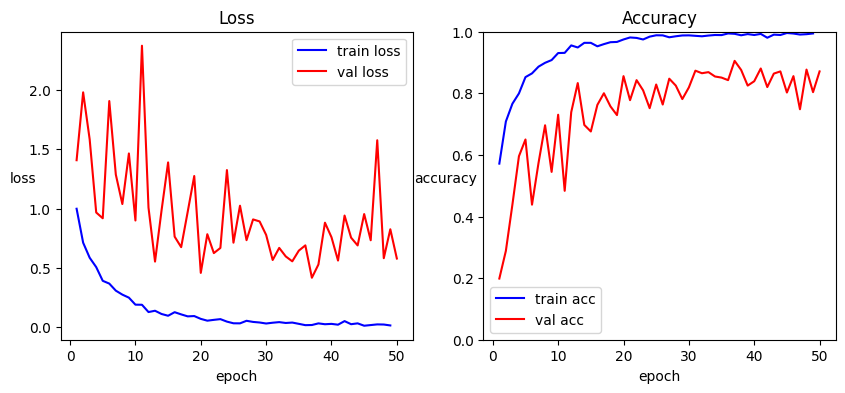

In [18]:
def show_result(result):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(result['train loss'])+1), result['train loss'], c='b', label='train loss')
    plt.plot(range(1, len(result['val loss'])+1), result['val loss'], c='r', label='val loss')
    plt.xlabel('epoch')
    plt.ylabel('loss', rotation=0)
    plt.title('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(result['train acc'])+1), result['train acc'], c='b', label='train acc')
    plt.plot(range(1, len(result['val acc'])+1), result['val acc'], c='r', label='val acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy', rotation=0)
    plt.title('Accuracy')
    plt.ylim([0, 1.0])
    
    plt.legend()
    
    plt.show()

show_result(result)

# import json

# # 딕셔너리 데이터를 JSON 파일로 저장
# with open('./Model/mobilenet_v3_large.json', 'w') as f:
#     json.dump(result, f)  # result 딕셔너리를 JSON 형식으로 파일에 저장

Sequential(
  (0): Linear(in_features=960, out_features=1280, bias=True)
  (1): Hardswish()
  (2): Dropout(p=0.2, inplace=True)
  (3): Linear(in_features=1280, out_features=1000, bias=True)
)